# Traffic Prediction (dataset from Kaggle)

In [1]:
import numpy as np
import pandas as pd

In [2]:
traffic_df = pd.read_csv("traffic.csv")

**Obtaining general information on the dataset**

In [3]:
traffic_df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [4]:
traffic_df.describe()

,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


In [5]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [6]:
traffic_df.shape

(48120, 4)

In [7]:
traffic_df.columns

Index(['DateTime', 'Junction', 'Vehicles', 'ID'], dtype='object')

In [8]:
junction_count = traffic_df['Junction'].value_counts()
junction_count

1    14592
2    14592
3    14592
4     4344
Name: Junction, dtype: int64

**Removing ID because traffic congestion has no relation to vehicle ID**

In [9]:
traffic_df.drop('ID', axis=1, inplace = True)

In [10]:
traffic_df

,DateTime,Junction,Vehicles
0,2015-11-01 00:00:00,1,15
1,2015-11-01 01:00:00,1,13
2,2015-11-01 02:00:00,1,10
3,2015-11-01 03:00:00,1,7
4,2015-11-01 04:00:00,1,9
...,...,...,...
48115,2017-06-30 19:00:00,4,11
48116,2017-06-30 20:00:00,4,30
48117,2017-06-30 21:00:00,4,16
48118,2017-06-30 22:00:00,4,22


**Checking for null values and correcting them**

In [11]:
traffic_df.isna().value_counts()

DateTime  Junction  Vehicles
False     False     False       48120
dtype: int64

In [12]:
traffic_df.columns

Index(['DateTime', 'Junction', 'Vehicles'], dtype='object')

**Plots for Junction wise traffic**

In [13]:
import matplotlib.pyplot as plt

In [14]:
import seaborn as sns

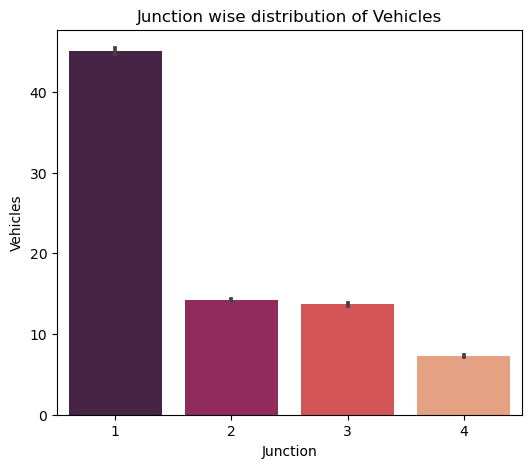

In [15]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.barplot(x='Junction', y='Vehicles', palette='rocket', data=traffic_df,ax=ax)
plt.title("Junction wise distribution of Vehicles")
plt.show()

**Extracting time for further manipulation**

In [16]:
import datetime as dt

In [17]:
traffic_df['DateTime'] = pd.to_datetime(traffic_df['DateTime'])
traffic_df['Time'] = traffic_df['DateTime'].dt.strftime('%H:%M:%S')
traffic_df['Date'] = traffic_df['DateTime'].dt.strftime('%Y/%m/%d')

traffic_df

,DateTime,Junction,Vehicles,Time,Date
0,2015-11-01 00:00:00,1,15,00:00:00,2015/11/01
1,2015-11-01 01:00:00,1,13,01:00:00,2015/11/01
2,2015-11-01 02:00:00,1,10,02:00:00,2015/11/01
3,2015-11-01 03:00:00,1,7,03:00:00,2015/11/01
4,2015-11-01 04:00:00,1,9,04:00:00,2015/11/01
...,...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,19:00:00,2017/06/30
48116,2017-06-30 20:00:00,4,30,20:00:00,2017/06/30
48117,2017-06-30 21:00:00,4,16,21:00:00,2017/06/30
48118,2017-06-30 22:00:00,4,22,22:00:00,2017/06/30


In [18]:
vehicles_per_junction = traffic_df.groupby('Junction')['Vehicles'].sum()
print(vehicles_per_junction)



Junction
1    657412
2    207983
3    199823
4     31501
Name: Vehicles, dtype: int64


**Max vehicle count on a day**

In [19]:
max_vehicles = traffic_df['Vehicles'].max()
print("Maximum Number of Vehicles:", max_vehicles)
print('\n\n')

max_vehicles = traffic_df['Vehicles'].max()
max_vehicles_row = traffic_df.loc[traffic_df['Vehicles'] == max_vehicles]
print(max_vehicles_row)


Maximum Number of Vehicles: 180



                 DateTime  Junction  Vehicles      Time        Date
40723 2017-02-23 19:00:00         3       180  19:00:00  2017/02/23


<Axes: xlabel='Vehicles', ylabel='Count'>

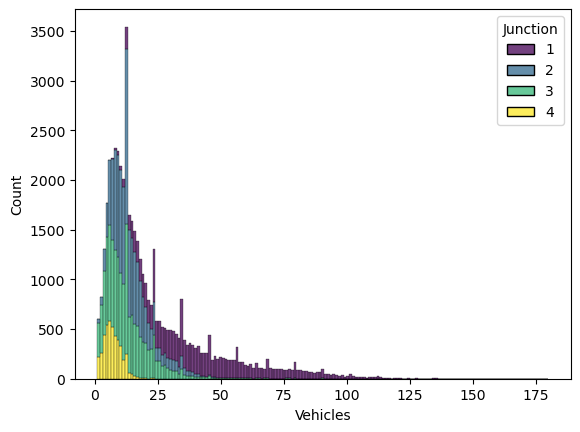

In [20]:
sns.histplot(data=traffic_df, x='Vehicles', hue='Junction', multiple='stack', palette='viridis')


**Comparing traffic time-wise on all the junctions**

In [21]:
traffic_df['Hour'] = traffic_df['Time'].str.split(':').str[0]
traffic_df

,DateTime,Junction,Vehicles,Time,Date,Hour
0,2015-11-01 00:00:00,1,15,00:00:00,2015/11/01,00
1,2015-11-01 01:00:00,1,13,01:00:00,2015/11/01,01
2,2015-11-01 02:00:00,1,10,02:00:00,2015/11/01,02
3,2015-11-01 03:00:00,1,7,03:00:00,2015/11/01,03
4,2015-11-01 04:00:00,1,9,04:00:00,2015/11/01,04
...,...,...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,19:00:00,2017/06/30,19
48116,2017-06-30 20:00:00,4,30,20:00:00,2017/06/30,20
48117,2017-06-30 21:00:00,4,16,21:00:00,2017/06/30,21
48118,2017-06-30 22:00:00,4,22,22:00:00,2017/06/30,22


In [22]:
sns.lineplot(data=traffic_df, x='Hour', y='Vehicles', hue='Junction',palette=')
plt.xlabel('Hour')
plt.ylabel('Number of Vehicles')
plt.title('Traffic Distribution over Time by Junction')
plt.show()

max_vehicles_junction_1 = traffic_df[traffic_df['Junction'] == 1]['Vehicles'].max()
print(max_vehicles_junction_1)


SyntaxError: EOL while scanning string literal (3830630520.py, line 1)

In [ ]:
#Extracting year month and date from the datetime column

traffic_df['Year'] = traffic_df['Date'].str.split('/').str[0]
traffic_df['Month'] = traffic_df['Date'].str.split('/').str[1]
traffic_df['Day'] = traffic_df['Date'].str.split('/').str[2]

traffic_df

In [ ]:
peak_hour = traffic_df.groupby('Hour')['Vehicles'].mean().idxmax()
print("Peak Hour Timing:", peak_hour)


In [ ]:
traffic_df['Year'].value_counts()

In [ ]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.barplot(x='Year', y='Vehicles', palette='rocket', data=traffic_df,ax=ax)
plt.title("Year wise distribution of Vehicles")
plt.show()

In [ ]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(x='Year',data=traffic_df,hue='Junction',palette='viridis')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(data=traffic_df, x='Month', y='Vehicles', hue='Year')
plt.xlabel('Month')
plt.ylabel('Number of Vehicles')
plt.title('Traffic Distribution over Time by Junction')

plt.show()


### Questions that can be asked on the dataset:

 #### 1. Which junction had the highest traffic?
 #### 2. What time did that junction have the most traffic
 #### 3. Max vehicle count
 #### 4. Peak hour timings
 #### 5. How has traffic changed over the years?
 #### 6. Which year had the most traffic?
 #### 7. Comparison between all the years (which months in a year had the most congestion)
 #### 8. Overall trend of traffic at all junctions(increasing/decreasing)

### Answers according to the analysis

#### 1. Junction 1 had the highest traffic
#### 2. Junction 1 had highest traffic at 19:00:00
#### 3. 180 vehicles at Junction 3
#### 4. All junctions had a peak hour timing of 19:00:00
#### 5. Increasing trend
#### 6. 2017
#### 7. Traffic increased as the months approached
#### 8. Increasing
